# Analysis of Donald Trump's Tweets 

### Question 1

## Read the dataset into a dataframe

Read the dataset **'trump_twitter.csv'** into a dataframe with name **trump_df** using pandas.

In [1]:
# Importing all the required libraries #
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
trump_df = pd.read_csv('trump.csv')
# trump_df['id'].astype('str')

In [3]:
trump_df

,id,link,content,date,retweets,favorites,mentions,hashtags,geo
0,1698308935,https://twitter.com/realDonaldTrump/status/169...,Be sure to tune in and watch Donald Trump on L...,2009-05-04 20:54:25,500,868,NaN,NaN,NaN
1,1701461182,https://twitter.com/realDonaldTrump/status/170...,Donald Trump will be appearing on The View tom...,2009-05-05 03:00:10,33,273,NaN,NaN,NaN
2,1737479987,https://twitter.com/realDonaldTrump/status/173...,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 15:38:08,12,18,NaN,NaN,NaN
3,1741160716,https://twitter.com/realDonaldTrump/status/174...,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 22:40:15,11,24,NaN,NaN,NaN
4,1773561338,https://twitter.com/realDonaldTrump/status/177...,"""My persona will never be that of a wallflower...",2009-05-12 16:07:28,1399,1965,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
41117,1218962544372670467,https://twitter.com/realDonaldTrump/status/121...,I have never seen the Republican Party as Stro...,2020-01-19 19:24:52,32620,213817,NaN,NaN,NaN
41118,1219004689716412416,https://twitter.com/realDonaldTrump/status/121...,Now Mini Mike Bloomberg is critical of Jack Wi...,2020-01-19 22:12:20,36239,149571,NaN,NaN,NaN
41119,1219053709428248576,https://twitter.com/realDonaldTrump/status/121...,I was thrilled to be back in the Great State o...,2020-01-20 01:27:07,16588,66944,NaN,#,NaN
41120,1219066007731310593,https://twitter.com/realDonaldTrump/status/121...,"“In the House, the President got less due proc...",2020-01-20 02:16:00,20599,81921,@ @ @,NaN,NaN


In [4]:
# General Info of the datset #
trump_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41122 entries, 0 to 41121
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         41122 non-null  int64  
 1   link       41122 non-null  object 
 2   content    41122 non-null  object 
 3   date       41122 non-null  object 
 4   retweets   41122 non-null  int64  
 5   favorites  41122 non-null  int64  
 6   mentions   22467 non-null  object 
 7   hashtags   5810 non-null   object 
 8   geo        0 non-null      float64
dtypes: float64(1), int64(3), object(5)
memory usage: 2.8+ MB


There are some unnecessary columns for the analysis of the dataset, such as 'id' and 'link' columns, which are just the unique id of each tweet and their links and they don't affect the data in any way. Further, 'geo' column has no values in it and 'hashtags' column has values in only 15% of the rows. Finally, the mention column is unncessary as well, since all the mentions and twitter handles even in the content of the tweet will be removed as unnecessary data.

In [6]:
# Making a copy of the original dataset #

df = trump_df.copy()

# Dropping the unnecessary columns #

df = df.drop(columns=['mentions','hashtags','geo','link','id'])

# Keeping only the dates in the date column #

df['date'] = pd.to_datetime(df['date']).dt.date

df.head()

,content,date,retweets,favorites
0,Be sure to tune in and watch Donald Trump on L...,2009-05-04,500,868
1,Donald Trump will be appearing on The View tom...,2009-05-05,33,273
2,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08,12,18
3,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08,11,24
4,"""My persona will never be that of a wallflower...",2009-05-12,1399,1965


In [7]:
# Duplicated rows #
df[df.duplicated()]

,content,date,retweets,favorites
6572,@ TheBradBaker. Thanks.,2013-02-19,0,0


In [8]:
# Dropping the duplicates #
df = df.drop_duplicates(ignore_index=True)

### Question 2

## Trump is really excited for running as President. 

Find the percentage of tweets with **atleast one '!'**.

In [4]:
# Write your code here to get the desired output mentioned below

52.00892857142857 %


In [9]:
print(f"The percentage of tweets with at least one '!' is {df.content.str.contains(r'!').sum()/df.shape[0]*100} %")

The percentage of tweets with at least one '!' is 49.13304637533134 %


### Question 3

## Number of Tweets Donald Trump posted per day

Plot the number of tweets per day trump posted.

http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.split.html


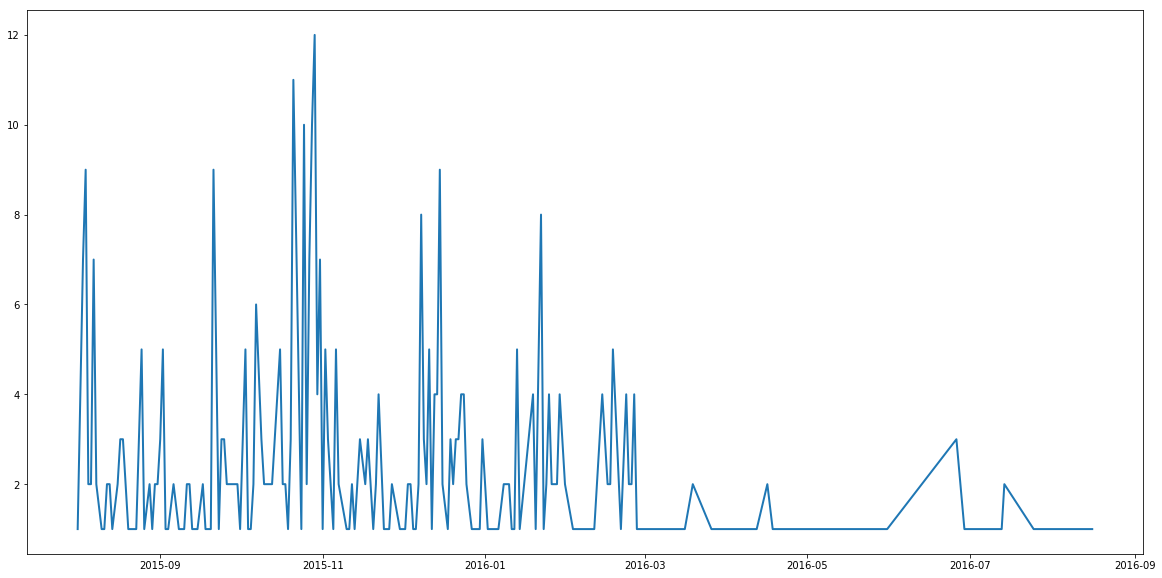

In [10]:
# Write your code here to get the desired output mentioned below
plt.show()

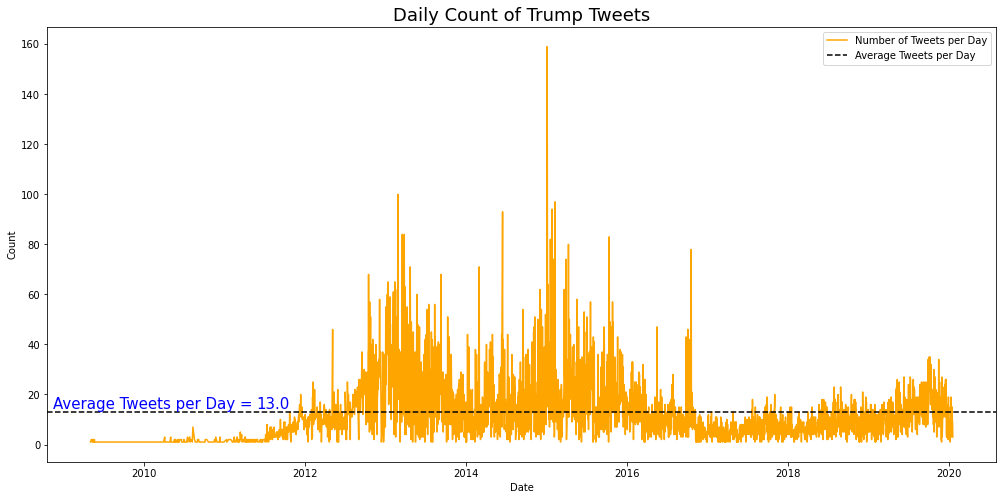

In [10]:
# Plotting the daily tweet counts #
df.content.groupby(df['date']).count().plot(figsize=(17,8),xlabel='Date',ylabel='Count',
                                            c='orange',label='Number of Tweets per Day')

# Calculating and plotting the average tweets per day #
mean = round(df.content.groupby(df['date']).count().mean(),0)
plt.axhline(mean,ls='--',c='k',label='Average Tweets per Day')
plt.text(14200,mean,
         'Average Tweets per Day = ',c='b',ha='left',va='bottom',fontsize=15)
plt.text(15120,mean,mean,c='b',ha='left',va='bottom',fontsize=15)

plt.title('Daily Count of Trump Tweets',fontsize=18)
plt.legend()

plt.show()

*We can see that Trumps's twitter was practically inactive at the start until the 3rd quarter of 2011. But Trump tweeted very actively between 2013 and the end of 2016 and became bit more active again at the end of 2019.*

### Question - 04

Remove weird spaces, stopwords and perform basic pre-processing - spelling correction, etc. 

In [11]:
# Pattern to remove urls, twitter handles, hashtags and other unnecessary symbols or data for further analysis #
pattern=r'(@\s\w+)|(@\w+)|https?://[^\s<>"]+|(?i)\b((?:[a-z][\w-]+:(?:/{1,3}|[a-z0-9%])|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'".,<>?«»“”‘’]))'

In [12]:
# Importing natural language toolkit and dowloading the stopwords from nltk #
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# Tokenizing the tweets using str.split() #
# Removing any url's present in the tweets #
df['content'] = df['content'].str.replace(pattern, "", case=False)

# Converting all the text data into lower case and keeping only the text/alphabetical data #
df['content'] = df['content'].str.lower().str.replace('[^a-z]', ' ').str.split()

# Removing all the stop words from the text data of the tweets #
df['content'] = df['content'].apply(lambda x: ' '.join([word for word in x if word not in set(stopwords.words('english'))]))

df

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,content,date,retweets,favorites
0,sure tune watch donald trump late night david ...,2009-05-04,500,868
1,donald trump appearing view tomorrow morning d...,2009-05-05,33,273
2,donald trump reads top ten financial tips late...,2009-05-08,12,18
3,new blog post celebrity apprentice finale less...,2009-05-08,11,24
4,persona never wallflower rather build walls cl...,2009-05-12,1399,1965
...,...,...,...,...
41116,never seen republican party strong unified rig...,2020-01-19,32620,213817
41117,mini mike bloomberg critical jack wilson saved...,2020-01-19,36239,149571
41118,thrilled back great state texas tonight people...,2020-01-20,16588,66944
41119,house president got less due process terrorist...,2020-01-20,20599,81921


### Question - 05

Perform Stemming or Lemmatization, comment on the different outputs.

In [13]:
# Copying the data for stemming process #
df_stem = df.copy()

# Stemming the text data #
from nltk.stem.porter import PorterStemmer

# Instantiating the stemmer #
stem = PorterStemmer()

df_stem['content'] = df_stem['content'].str.split()

df_stem['content'] = df_stem['content'].apply(lambda x: ' '.join([stem.stem(word) for word in x]))

df_stem

,content,date,retweets,favorites
0,sure tune watch donald trump late night david ...,2009-05-04,500,868
1,donald trump appear view tomorrow morn discuss...,2009-05-05,33,273
2,donald trump read top ten financi tip late sho...,2009-05-08,12,18
3,new blog post celebr apprentic final lesson le...,2009-05-08,11,24
4,persona never wallflow rather build wall cling...,2009-05-12,1399,1965
...,...,...,...,...
41116,never seen republican parti strong unifi right...,2020-01-19,32620,213817
41117,mini mike bloomberg critic jack wilson save pe...,2020-01-19,36239,149571
41118,thrill back great state texa tonight peopl kno...,2020-01-20,16588,66944
41119,hous presid got less due process terrorist got...,2020-01-20,20599,81921


In [14]:
# Copying the data for lemmatization #
df_lemma = df.copy()

# lemmatizing the text data #
from nltk.stem import WordNetLemmatizer

# Instantiating the lemmatizer #
lemma = WordNetLemmatizer()

df_lemma['content'] = df_lemma['content'].str.split()

df_lemma['content'] = df_lemma['content'].apply(lambda x: ' '.join([lemma.lemmatize(word) for word in x]))

df_lemma

,content,date,retweets,favorites
0,sure tune watch donald trump late night david ...,2009-05-04,500,868
1,donald trump appearing view tomorrow morning d...,2009-05-05,33,273
2,donald trump read top ten financial tip late s...,2009-05-08,12,18
3,new blog post celebrity apprentice finale less...,2009-05-08,11,24
4,persona never wallflower rather build wall cli...,2009-05-12,1399,1965
...,...,...,...,...
41116,never seen republican party strong unified rig...,2020-01-19,32620,213817
41117,mini mike bloomberg critical jack wilson saved...,2020-01-19,36239,149571
41118,thrilled back great state texas tonight people...,2020-01-20,16588,66944
41119,house president got le due process terrorist g...,2020-01-20,20599,81921


In [15]:
# Comparing the original, stemmed and lemmatized texts #

# Original tweet #
print(trump_df.iloc[500,2],'\n')

# Stemmed tweet #
print(df_stem.iloc[500,0],'\n')

# Lemmatized tweet #
print(df_lemma.iloc[500,0])

@ BarackObama is so inept that I think he simply made a mistake in originally scheduling the Joint Session on September 7th. Just sad. 

inept think simpli made mistak origin schedul joint session septemb th sad 

inept think simply made mistake originally scheduling joint session september th sad


*We can see above that the stemmed text is pretty different compared to the lemmatized text. Eventhough stemming and lemmatization are similar, unlike stemming, lemmatization reduces a word to its root form that actually exists in its langauge rather than reducing the words to their root forms phonetically. This can be seen in the above output, for example, the words 'simply','mistake', 'scheduling' etc from the original text have been converted to 'simpli','mistak' and 'schedul' in the stemmed text whereas in the lemmatized text they are 'simply', 'mistake' and 'scheduling' which helps in keeping the context of the tweet intact.*

***Usually lemmatization is preferred over stemming, since it results in more meaningful words and also helps in achieving greater accuracy.***

In [16]:
# Copying the lemmatized data #
df_clean = df_lemma.copy()

### Question - 06

Plot a grpah to visualize the most common words used by Donald Trump in his tweets.

In [17]:
# Importing the word counter for counting the most frequent words used by Trump in his tweets #
from collections import Counter

# Creating a new dataframe with the 75 frequent words and their count in Trump's tweets #
freq_words = pd.DataFrame(Counter(' '.join(df_clean['content']).split()).most_common(75), columns=['Words', 'Count'])
freq_words.head()

,Words,Count
0,trump,6361
1,great,6253
2,president,2921
3,thank,2789
4,u,2649


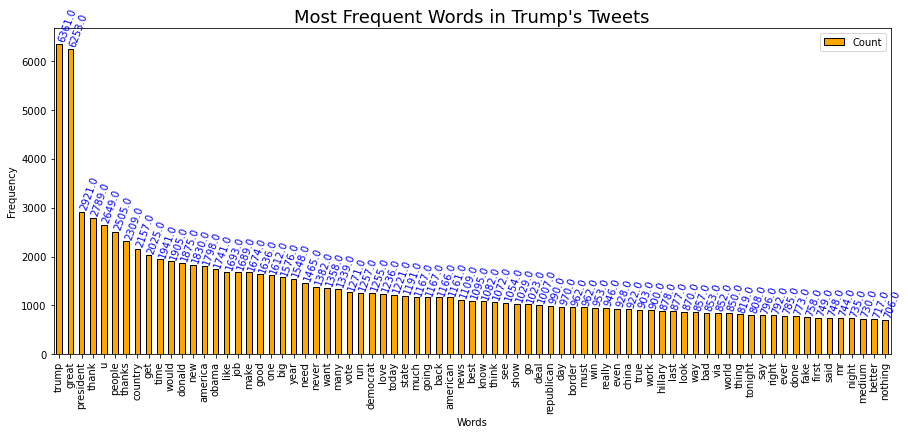

In [18]:
# Plotting the most frequent words used by Trump in his tweets #
ax = freq_words.plot(x='Words', kind='bar', color='orange', figsize=(15,6), edgecolor='k',
                    xlabel='Words', ylabel='Frequency', label='Word Count')

plt.title("Most Frequent Words in Trump's Tweets", fontsize=18)

# Annotating the numbers over the respective bars #
for p in ax.patches:
    x = p.get_bbox().get_points()[0,0]
    y = p.get_bbox().get_points()[1,1]
    ax.annotate(y, (x,y+10), ha='left', va='bottom', fontsize=10, rotation=70,c='b')

#plt.tight_layout()
plt.show()

'trump' and 'great' seem to be the most used words in Trump's tweets followed by 'president'.

In [19]:
# importing wordcloud to visualize the most frequent words in Trump's tweets #
from wordcloud import WordCloud

# Creating a list of the most frequent words #
word_list = freq_words.Words.tolist()

words = ' '.join(word_list)

words

'trump great president thank u people thanks country get time would donald new america obama like job make good one big year need never want many vote run democrat love today state much going back american news best know think see show go deal republican day border must win really even china true work hillary last look way bad via world thing tonight say right ever done fake first said mr night medium better nothing'

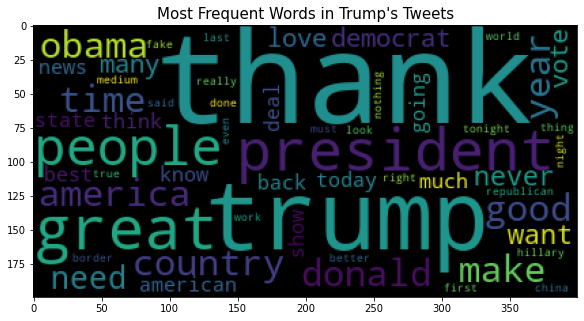

In [20]:
# Generating a word cloud with the most frequent words having 4 or more letters #
trump_cloud = WordCloud(min_word_length = 4).generate(words)

# Visualizing the generated word cloud #
plt.figure(figsize=(10,5))
plt.imshow(trump_cloud)

plt.title('Most Frequent Words in Trump\'s Tweets', fontsize=15)
plt.show()

### Question - 07

Using sentiment.polarity_score function, Find the polarity score of all the tweets and categorize them as Positive, Negative or Neutral.

In [21]:
# Using the VADER sentiment polarity function to get the polarity scores for the tweets #
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Instantiating the sentiment analyzer #
senti = SentimentIntensityAnalyzer()

# Calculating the compound polarity scores #
polarity_2 = [round(senti.polarity_scores(i)['compound'], 2) for i in df_clean['content']]
df_clean['compound_score'] = polarity_2

# Classifying the tweets into positive, negative and neutral based on the polarity scores #
for i in range(df_clean.shape[0]):
    if df_clean.loc[i,'compound_score'] > 0.25:    # Tweets with more than 0.25 score as Positive #
        df_clean.loc[i,'sentiment'] = 'Positive'
    elif df_clean.loc[i,'compound_score'] < -0.25:  # Tweets with less than -0.25 score as Negative #
        df_clean.loc[i,'sentiment'] = 'Negative'
    else:
        df_clean.loc[i,'sentiment'] = 'Neutral'     # Tweets with scores between -.25 and .25 as Neutral #

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [22]:
# Dataset after classifying the tweets based on sentiment polarity #
df_clean

,content,date,retweets,favorites,compound_score,sentiment
0,sure tune watch donald trump late night david ...,2009-05-04,500,868,0.48,Positive
1,donald trump appearing view tomorrow morning d...,2009-05-05,33,273,0.75,Positive
2,donald trump read top ten financial tip late s...,2009-05-08,12,18,0.57,Positive
3,new blog post celebrity apprentice finale less...,2009-05-08,11,24,0.00,Neutral
4,persona never wallflower rather build wall cli...,2009-05-12,1399,1965,0.00,Neutral
...,...,...,...,...,...,...
41116,never seen republican party strong unified rig...,2020-01-19,32620,213817,0.73,Positive
41117,mini mike bloomberg critical jack wilson saved...,2020-01-19,36239,149571,-0.79,Negative
41118,thrilled back great state texas tonight people...,2020-01-20,16588,66944,0.94,Positive
41119,house president got le due process terrorist g...,2020-01-20,20599,81921,-0.69,Negative


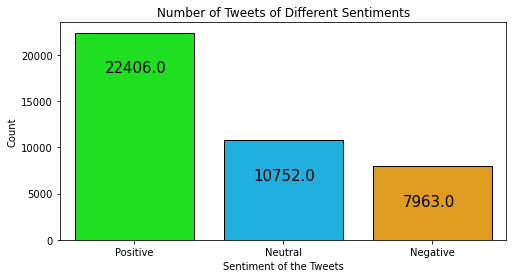

In [23]:
# Plotting the number of tweets of each sentiment #

plt.figure(figsize=(8,4))

ax = sns.countplot(data=df_clean,x='sentiment',palette={'Positive':'lime','Neutral':'deepskyblue','Negative':'orange'},
                  edgecolor='k', linewidth=1)

plt.xlabel('Sentiment of the Tweets')
plt.ylabel('Count')
plt.title('Number of Tweets of Different Sentiments')

for p in ax.patches:
    x = p.get_bbox().get_points()[0,0]
    y = p.get_bbox().get_points()[1,1]
    ax.annotate(y, (x+.2,y-3000), ha='left', va='top', fontsize=15)
    
plt.show()

*More than half of the tweets are Positive and a fourth of them are neutral and around 20% are negative.*

### Question - 08

Using wordcloud or other visualization techniques, Find the most common words used positive and negative tweets

In [24]:
# Importing the word counter for counting the most frequent words used by Trump in his tweets #
from collections import Counter

# 75 most common words used in Trump's positive tweets #
pos_words = pd.DataFrame(Counter(' '.join(df_clean.loc[df_clean.sentiment=='Positive','content']).split()).most_common(75), 
                         columns=['Words', 'Count'])

# 75 most common words used in Trump's negative tweets #
neg_words = pd.DataFrame(Counter(' '.join(df_clean.loc[df_clean.sentiment=='Negative','content']).split()).most_common(75), 
                         columns=['Words', 'Count'])

In [25]:
# Most frequent words in positive tweets #
pos_words.head()

,Words,Count
0,great,5811
1,trump,3582
2,thank,2650
3,thanks,2233
4,president,1581


In [26]:
# Most frequent words in negative tweets #
neg_words.head()

,Words,Count
0,trump,771
1,people,718
2,obama,700
3,u,693
4,bad,615


In [27]:
# Listing down the 75 most frequent words from positive and negative tweets #
from wordcloud import WordCloud

pos_list = pos_words.Words.tolist()
neg_list = neg_words.Words.tolist()

pos = ' '.join(pos_list)
neg = ' '.join(neg_list)

pos,neg

('great trump thank thanks president u good people america like country make love job new best get would donald time one big need win state year today true run vote many much back american day want show think see work going amazing better never deal mr really know obama world republican well tonight please last night nice ever look congratulation border united happy go thing done democrat hope way keep first news man must support',
 'trump people obama u bad president democrat time country get fake news year would never many hillary want medium one even must new border big going job american go china stop back much nothing know said crime like really made republican clinton wrong terrible deal need make illegal show say state crooked total attack way great story sad last donald obamacare hunt problem disaster witch totally thing right got election america think look vote world')

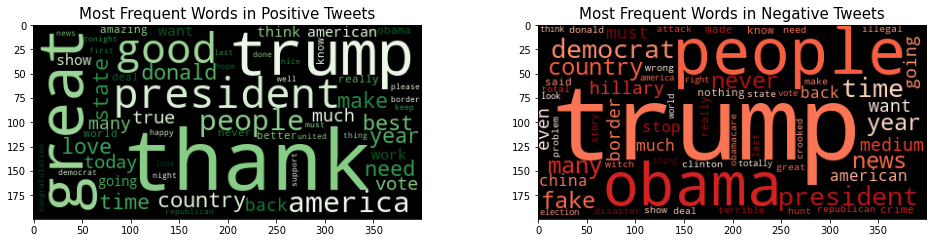

In [60]:
# Generating and visualizing the most frequent words in positive and negative tweets #

pos_cloud = WordCloud(min_word_length = 4,colormap='Greens').generate(pos)
neg_cloud = WordCloud(min_word_length = 4,colormap='Reds').generate(neg)

fig, axes = plt.subplots(ncols=2, figsize=(16, 8))

ax1,ax2=axes

# Wordcloud with positive words #
cld1 = ax1.imshow(pos_cloud)
ax1.set_title('Most Frequent Words in Positive Tweets',fontsize=15)

# wordcloud with negative words #
cld2 = ax2.imshow(neg_cloud)
ax2.set_title('Most Frequent Words in Negative Tweets',fontsize=15)

plt.subplots_adjust(wspace=0.3)
plt.show()

We can see clearly the most frequent words in the positive tweets apart from 'trump' are, 'thank','great','president','america','people' etc. And for the negative tweets, apart from 'trump' are, 'obama','democrat','people','hillary' etc.

### Question - 09

Based on the polarity scores of every tweet, plot the mean positivity / negativity scores with respect to year.

In [29]:
# Making a dataset with just the required columns #
grp = df_clean[['date','sentiment','compound_score']]

# Keeping only the year part of the dates #
grp['date'] = pd.to_datetime(grp['date']).dt.year

# Creating another dataset with the yearly average of polarity scores with respect to their polarity or sentiment #
mean_scores = grp.groupby(['sentiment','date'], as_index=False)['compound_score'].mean()

In [30]:
# First 5 values of the yearly average polarity scores #
mean_scores.head()

,sentiment,date,compound_score
0,Negative,2009,-0.405000
1,Negative,2011,-0.557902
2,Negative,2012,-0.556898
3,Negative,2013,-0.588178
4,Negative,2014,-0.572952


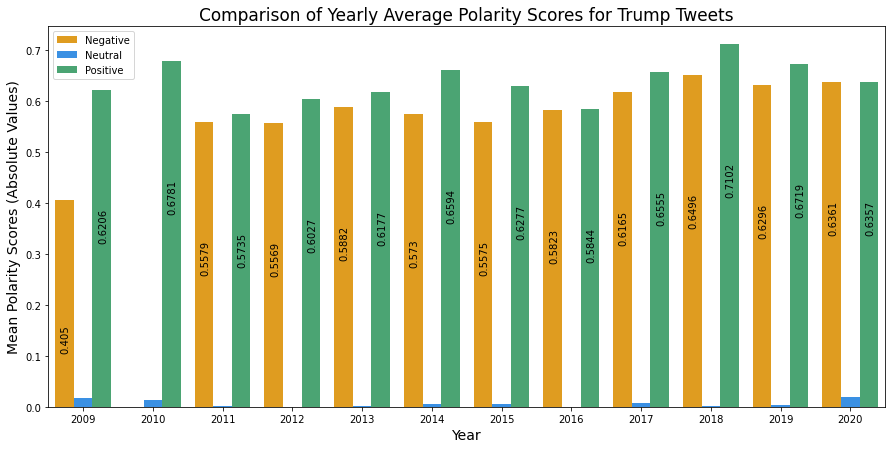

In [31]:
# Visualizing the absolute values of average polarity scores for every year and every sentiment of the tweets #

plt.figure(figsize=(15,7))

# Plotting the absolute values of the mean values for easier comparison #
ax = sns.barplot(data=mean_scores,x='date',y=abs(mean_scores['compound_score']),hue='sentiment',
                 palette={'Positive':'#3CB371','Negative':'#FFA500','Neutral':'#1E90FF'})

ax.set_xlabel('Year',fontsize=14)
ax.set_ylabel('Mean Polarity Scores (Absolute Values)',fontsize=14)
ax.set_title('Comparison of Yearly Average Polarity Scores for Trump Tweets',fontsize=17)
ax.legend(loc=2)

for p in ax.patches:
    x = p.get_bbox().get_points()[0,0]
    y = p.get_bbox().get_points()[1,1]
    ax.annotate(round(y,4), (x+.08,y-0.3), ha='left', va='bottom', fontsize=10, rotation=90)
    
plt.show()

The above plot shows the average polarity scores of Trump's tweets over the years. The absolute values of the polarity scores have been considered for easier comparison through visualization. There were no negative tweets in the year of 2010. Except for 2009, the average positivity and negativity of the tweets seem to be almost equal throughout with positivity being marginally higher of the two.

### Question - 10

Split the dataset into train / test set and perform feature engineering to get the top features (or create new features, if required)

In [32]:
# Repositioning the sentiment/label column #
y_col = df_clean.pop('sentiment')
df_clean.insert(0,'sentiment',y_col)
df_clean.head()

,sentiment,content,date,retweets,favorites,compound_score
0,Positive,sure tune watch donald trump late night david ...,2009-05-04,500,868,0.48
1,Positive,donald trump appearing view tomorrow morning d...,2009-05-05,33,273,0.75
2,Positive,donald trump read top ten financial tip late s...,2009-05-08,12,18,0.57
3,Neutral,new blog post celebrity apprentice finale less...,2009-05-08,11,24,0.00
4,Neutral,persona never wallflower rather build wall cli...,2009-05-12,1399,1965,0.00


In [33]:
df_clean.columns

Index(['sentiment', 'content', 'date', 'retweets', 'favorites',
       'compound_score'],
      dtype='object')

Out of all the columns, the only columns needed for sentiment analysis are, 'sentiment','content' and 'compound_score'.

In [34]:
# Dropping the unnecessary columns #

df_final = df_clean.drop(columns=['date','retweets','favorites'])
df_final.head()

,sentiment,content,compound_score
0,Positive,sure tune watch donald trump late night david ...,0.48
1,Positive,donald trump appearing view tomorrow morning d...,0.75
2,Positive,donald trump read top ten financial tip late s...,0.57
3,Neutral,new blog post celebrity apprentice finale less...,0.00
4,Neutral,persona never wallflower rather build wall cli...,0.00


In [35]:
# Encoding the sentiment column and setting it as the label #
from sklearn.preprocessing import LabelEncoder

# Instantiating the label encoder #
le = LabelEncoder()

# Encoding the output variable and setting it as the label for the ML models #
Y = le.fit_transform(df_final.sentiment)

Y[:5]

array([2, 2, 2, 1, 1])

In [36]:
# Mapping the classes to their respective coded numbers #
integer_mapping = {l: i for i, l in enumerate(le.classes_)}
integer_mapping

{'Negative': 0, 'Neutral': 1, 'Positive': 2}

In [37]:
# importing the vectorizer #
from sklearn.feature_extraction.text import CountVectorizer

# Instantiating the vectorizer #
cv = CountVectorizer()

# Vectorizing the text into numerical data #
X = pd.DataFrame(cv.fit_transform(df_final.content).toarray(), columns=cv.get_feature_names())

In [38]:
# Adding the compound score as the feature to the dataset #
X = pd.concat([X,df_final['compound_score']],axis=1)
X.shape

(41121, 18077)

In [39]:
# Splitting the dataset into train and test sets with a 70% and 30% ratio #
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

### Question - 11

Train a Machine learning model using KNN, Decision tree, SVM and Random Forest. 

### *KNN*

In [61]:
# Training and predicting with the KNN model for the dataset #

# Importing the KNN algorithm #
from sklearn.neighbors import KNeighborsClassifier

# Instantiating the model to run 3 jobs parallelly #
knn = KNeighborsClassifier(n_jobs=3)

# Fitting the training set #
knn.fit(X_train,y_train)

# Predicting the test labels #
y_knn = knn.predict(X_test)

### *Decision Tree*

In [62]:
# Training and predicting with the Decision Tree model for the dataset #

# Importing the Decision Tree algorithm #
from sklearn.tree import DecisionTreeClassifier

# Instantiating the model #
tree = DecisionTreeClassifier()

# Training the model #
tree.fit(X_train,y_train)

# Predicting the test labels #
y_tree = tree.predict(X_test)

### *Random Forest*

In [63]:
# Random Forest Model #

# Importing the Random Forest algorithm #
from sklearn.ensemble import RandomForestClassifier

# Instantiating the model # 
forest = RandomForestClassifier(n_jobs=3)

# Training the model #
forest.fit(X_train,y_train)

# Predicting the labels #
y_forest = forest.predict(X_test)

### *SVM*

In [64]:
# Support Vector Machine #

# Importing the SV Classifier #
from sklearn.svm import SVC

# Instantiating the model with the required parameters #
svc = SVC(kernel = "linear",gamma='auto',cache_size=400)

# Training the model #
svc.fit(X_train,y_train)

# Predicting the labels #
y_svc = svc.predict(X_test)

### *Logistic Regression*

In [93]:
# Using the Logistic Regression model as well #

# Importing the logistic regression model #
from sklearn.linear_model import LogisticRegression

# Instantiating the model #
logr = LogisticRegression(multi_class='multinomial')

# Training the model #
logr.fit(X_train,y_train)

# Predicting the labels #
y_log = logr.predict(X_test)

### Question - 12

Deduce the model evaluation of all the models and discuss the results for confusion matrix, accuracy score, Recall and Precision.

### *Model Evaluation and Comparison*

In [94]:
# Importing the different metrics to measure the effectiveness of the models #
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

# List of predicted labels #
predictions = [y_knn,y_tree,y_forest,y_svc,y_log]

# Dictionary for different metrics of all the models #
scores = {'Accuracy':[],'Precision':[],'Recall':[],'F1_Score':[]}

# Calculating all the evaluation metrics for all the models #
for pred in predictions:
    scores['Accuracy'].append(accuracy_score(pred,y_test))
    scores['Precision'].append(precision_score(pred,y_test,average='weighted'))
    scores['Recall'].append(recall_score(pred,y_test,average='weighted'))
    scores['F1_Score'].append(f1_score(pred,y_test,average='weighted'))

# Dataframe with evaluation metrics for the respective models #
score_df = pd.DataFrame(scores,
                        index=['KNN','Decision Tree','Random Forest','SVM','Logistic Regression']).T.round(decimals=4)
score_df

,KNN,Decision Tree,Random Forest,SVM,Logistic Regression
Accuracy,0.7261,1.0,0.9874,0.9832,0.9855
Precision,0.8189,1.0,0.9878,0.9833,0.9856
Recall,0.7261,1.0,0.9874,0.9832,0.9855
F1_Score,0.7310,1.0,0.9873,0.9832,0.9855


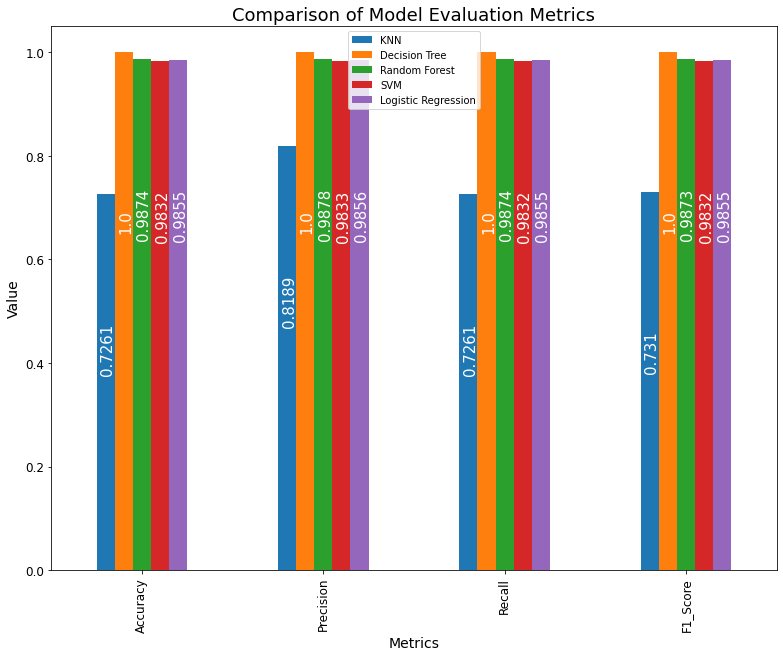

In [95]:
# Comparing the metrices of the models using visualization #

# Grouped bar chart comparing all the evaluationmetrics for the applied models #
ax = score_df.plot(kind='bar',figsize=(13,10),fontsize=12)
plt.xlabel('Metrics',fontsize=14)
plt.ylabel('Value',fontsize=14)
plt.title('Comparison of Model Evaluation Metrics',fontsize=18)

for p in ax.patches:
    x = p.get_bbox().get_points()[0,0]
    y = p.get_bbox().get_points()[1,1]
    ax.annotate(round(y,4), (x+.02,y-0.35), ha='left', va='bottom', fontsize=15, rotation=90, color='w')

plt.show()

*In the bar plot above, we can see the comparison of different evaluation metrics for the classification models used on the dataset. The* ***Decision Tree Classifier*** *model seems to be predicting the test labels perfectly with a 100% accuracy, whereas the* ***KNN Classifier*** *model has the least metric scores among all the models.* ***Random Forest Classifier,*** ***Support Vector Moachine Classifier*** *and* ***Logistic Regression*** *models are all marginally close according to their evaluation metrics in predicting the test labels. All in all,* ***Decision Tree*** *seems to be the best model among implemented models.*

In [96]:
# Importing the confusion matrix algorithm #
from sklearn.metrics import confusion_matrix

# Calculating the confusion matrices for every model #
cm_knn = confusion_matrix(y_knn,y_test)

cm_tree = confusion_matrix(y_tree,y_test)

cm_forest = confusion_matrix(y_forest,y_test)

cm_svc = confusion_matrix(y_svc,y_test)

cm_log = confusion_matrix(y_log,y_test)

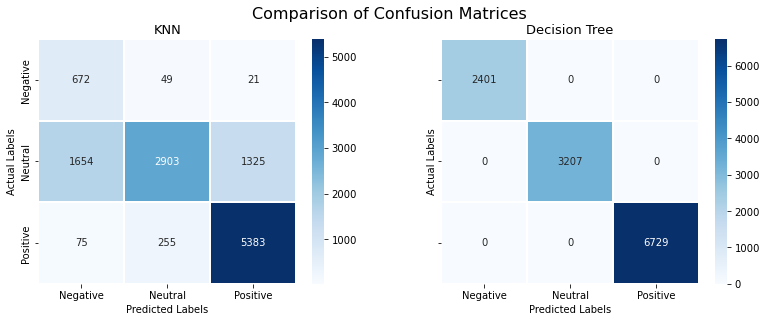

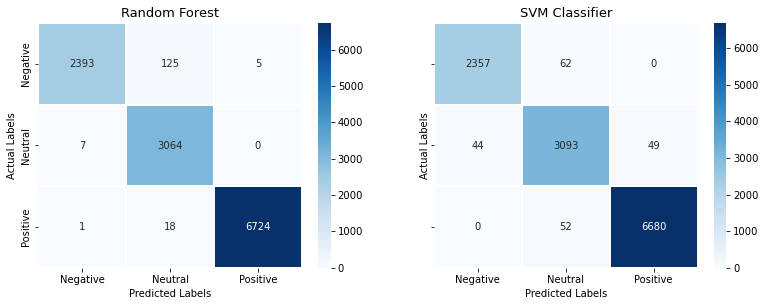

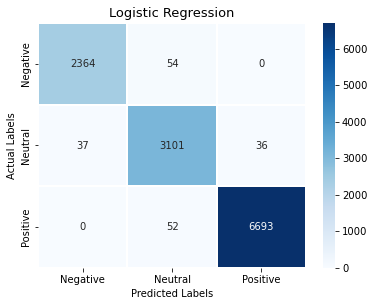

In [97]:
# Visualizing the confusion matrices of all the models for comparison #

fig1, axes1 = plt.subplots(ncols=2, sharey=True, figsize=(13,4.5))
plt.suptitle('Comparison of Confusion Matrices',fontsize=16)

ax1, ax2 = axes1

# KNN Confusion Matrix #
mat1 = sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', linewidth=0.1, ax=ax1)

ax1.set_xticklabels(integer_mapping.keys())

ax1.set_title('KNN',fontsize=13)
ax1.set_xlabel('Predicted Labels')
ax1.set_ylabel('Actual Labels')

# Decision Tree Confusion Matrix #
mat2 = sns.heatmap(cm_tree,annot=True, fmt='d', cmap='Blues', linewidth=0.1, ax=ax2)

ax2.set_xticklabels(integer_mapping.keys())
ax2.set_yticklabels(integer_mapping.keys())

ax2.set_title('Decision Tree',fontsize=13)
ax2.set_xlabel('Predicted Labels')
ax2.set_ylabel('Actual Labels')

plt.subplots_adjust(wspace=0.25)

fig2, axes2 = plt.subplots(ncols=2, sharey=True, figsize=(13,4.5))

ax3, ax4 = axes2

# Random Forest Confusion Matrix #
mat3 = sns.heatmap(cm_forest, annot=True, fmt='d', cmap='Blues', linewidth=0.1, ax=ax3)

ax3.set_xticklabels(integer_mapping.keys())

ax3.set_title('Random Forest',fontsize=13)
ax3.set_xlabel('Predicted Labels')
ax3.set_ylabel('Actual Labels')

# SVM Confusion Matrix #
mat4 = sns.heatmap(cm_svc,annot=True, fmt='d', cmap='Blues', linewidth=0.1, ax=ax4)

ax4.set_xticklabels(integer_mapping.keys())
ax4.set_yticklabels(integer_mapping.keys())

ax4.set_title('SVM Classifier',fontsize=13)
ax4.set_xlabel('Predicted Labels')
ax4.set_ylabel('Actual Labels')

fig3, axes3 = plt.subplots(ncols=1, figsize=(6,4.5))

ax5 = axes3

# Random Forest Confusion Matrix #
mat5 = sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues', linewidth=0.1, ax=ax5)

ax5.set_xticklabels(integer_mapping.keys())
ax5.set_yticklabels(integer_mapping.keys())

ax5.set_title('Logistic Regression',fontsize=13)
ax5.set_xlabel('Predicted Labels')
ax5.set_ylabel('Actual Labels')


plt.subplots_adjust(wspace=0.25)

plt.show()

        The confusion matrices for all the models have been represented visually as heatmaps above. The y-axis represents   the actual values present in the dataset and the x-axis represents the predicted values by the implemented models in    their respective heatmaps.
        
- **Classes:** *Negative,Neutral,Positive*
- The **diagonal cells** represent the **True Positive(TP)** values of the **respective class.**
- The values in the remaining **cells in the same row of the TPs for respective classes are False Positives(FP).**
- The values in the remaining **cells in the same column of the TPs for the respective classes are False Negatives(FN).**


- ***KNN:*** Out of a total number of 2401 Negative tweets in the test set, the model predicted only 672 as Negative,i.e TP, and 1654 as Neutral tweets and 75 as Positive tweets which are FNs for the Negative class. Hence, the precision for the Negative class will be very low, resulting in a low F1 score as well. However, there aren't many FPs for the Negative class, which will result in a high recall value. Similarly for the Neutral class, out of the 3207 actual values, 2903 are TPs and 49 as Negative and 255 as Positive contribute to the FNs of the Neutral class. But the number of FPs for the Neutral class are pretty high, resulting in low recall, high precision values. Lastly, for the Positive class, out of a total of 6729 actual values, 5383 were TPs and 1325 were predicted as Neutral and 21 as Negative which constitute the FNs. The amount of FPs are considerably low as well. Hence, the Positive class will have a considerably high values of both precision and recall. However, because of the presence of a large number of FPs and FNs, the accuracy of the model will be reduced.


- ***Decision Tree:*** There are no False Positives or False Negatives present for the Decision Tree model since it has predicted all the test labels perfectly resulting in a 100% accuracy and other metrics for the model.


- ***Random Forest, SVM and Logistic Regression Classifiers:*** All the three models have predicted most of the classes correctly and have very less number of False Negatives and False Positives. This can be seen in the high values of all the evaluation metrics for both the models.

In [98]:
# Creating the classification report for all the implemented models #

from sklearn.metrics import classification_report

rep_knn = classification_report(y_knn,y_test)

rep_tree = classification_report(y_tree,y_test)

rep_forest = classification_report(y_forest,y_test)

rep_svm = classification_report(y_svc,y_test)

rep_log = classification_report(y_log,y_test)

In [99]:
# Displaying the classification reports #

print('\033[1m*'*16,'Classification Reports', '*'*16,'\033[0m', '\n')
print('*'*25, '\033[1mKNN\033[0m', '*'*25, '\n', rep_knn, '\n')
print('*'*20, '\033[1mDecision Tree\033[0m', '*'*20, '\n', rep_tree, '\n')
print('*'*20, '\033[1mRandom Forest\033[0m', '*'*20, '\n', rep_forest, '\n')
print('*'*25, '\033[1mSVM\033[0m', '*'*25, '\n', rep_svm, '\n')
print('*'*18, '\033[1mLogistic Regression\033[0m', '*'*18, '\n', rep_log, '\n')


**************** Classification Reports ****************  

************************* KNN ************************* 
               precision    recall  f1-score   support

           0       0.28      0.91      0.43       742
           1       0.91      0.49      0.64      5882
           2       0.80      0.94      0.87      5713

    accuracy                           0.73     12337
   macro avg       0.66      0.78      0.64     12337
weighted avg       0.82      0.73      0.73     12337
 

******************** Decision Tree ******************** 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2401
           1       1.00      1.00      1.00      3207
           2       1.00      1.00      1.00      6729

    accuracy                           1.00     12337
   macro avg       1.00      1.00      1.00     12337
weighted avg       1.00      1.00      1.00     12337
 

******************** Random Forest ******************** 
 

The classification reports above show a detailed numerical description of the different evaluation metrics that have been discussed earlier for all the implemented models.

#### *From all the results and evaluations in the previous sections, we can conclude that the Decision Tree model gives the best results among all the models that were used for the classification of Trump's tweets based on their sentiment polarities.*

## *THANK YOU*